# MODEL COMPLEXITY IN LINEAR MODEL

- Ridge
- Lasso

In [64]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler

from sklearn.datasets import load_boston
from sklearn.linear_model import Lasso, Ridge 
from sklearn.metrics import mean_squared_error

In [65]:
boston = load_boston()

boston.keys()

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset 

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [66]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Define Features and Target

In [67]:
# boston['data']

In [68]:
# boston['feature_names']

In [69]:
X = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [70]:
y = pd.Series(boston['target'])
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Length: 506, dtype: float64

### Data Splitting

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1899)

### Ridge Regression

#### Scaling: Ridge dan Lasso butuh scaling

In [72]:
# scaler 
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Modeling Ridge (dengan alpha=1)

In [92]:
# define model
ridge = Ridge(alpha=1)

# fitting
ridge.fit(X_train_scaled, y_train)

# predict
y_pred = ridge.predict(X_test_scaled)

# MSE
mean_squared_error(y_test, y_pred)

27.686878880361675

In [93]:
ridge.coef_

array([ -7.60192002,   1.91781957,  -0.1691025 ,   1.90199202,
        -5.7170918 ,  20.45470755,   0.10105943, -11.21127904,
         5.67531115,  -5.74679552,  -8.70667177,   3.82301972,
       -19.43784435])

In [94]:
ridge_coef = pd.DataFrame({
    'Feature_Name': list(X),
    'Coef': ridge.coef_
}).sort_values('Coef')

ridge_coef

,Feature_Name,Coef
12,LSTAT,-19.437844
7,DIS,-11.211279
10,PTRATIO,-8.706672
0,CRIM,-7.601920
9,TAX,-5.746796
4,NOX,-5.717092
2,INDUS,-0.169103
6,AGE,0.101059
3,CHAS,1.901992
1,ZN,1.917820


''

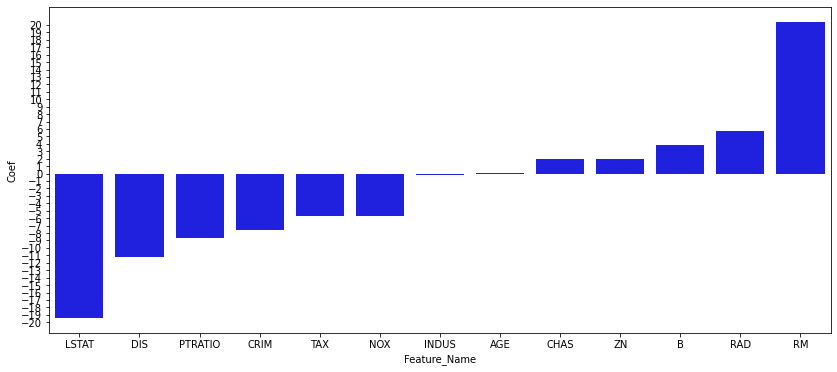

In [95]:
plt.figure(figsize=(14,6))
sns.barplot(data=ridge_coef, x='Feature_Name', y='Coef', color='b')
plt.yticks(range(-20,21))
;

#### Modeling Ridge (dengan alpha=1000)

In [87]:
# define model
ridge_1000 = Ridge(alpha=1000)

# fitting
ridge_1000.fit(X_train_scaled, y_train)

# predict
y_pred = ridge_1000.predict(X_test_scaled)

# MSE
mean_squared_error(y_test, y_pred)

75.67798038205832

In [88]:
ridge_coef_1000 = pd.DataFrame({
    'Feature_Name': list(X),
    'Coef': ridge_1000.coef_
}).sort_values('Coef')

ridge_coef_1000

,Feature_Name,Coef
9,TAX,-0.483826
12,LSTAT,-0.481476
8,RAD,-0.466321
10,PTRATIO,-0.391195
2,INDUS,-0.373164
4,NOX,-0.323044
6,AGE,-0.320691
0,CRIM,-0.121830
3,CHAS,0.115995
7,DIS,0.124217


''

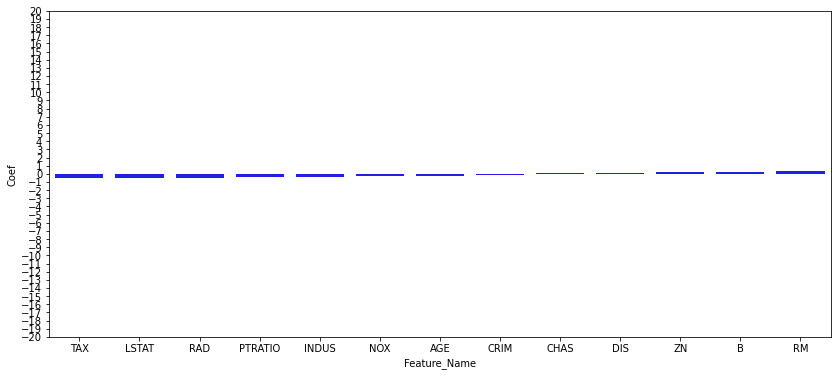

In [96]:
plt.figure(figsize=(14,6))
sns.barplot(data=ridge_coef_1000, x='Feature_Name', y='Coef', color='b')
plt.yticks(range(-20,21))
;

#### Looping: mencari nilai alpha terbaik


In [80]:
# Looping: mencari nilai alpha terbaik

alpha = [100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]

training_mse = []
testing_mse = []

score = 1000

for i in alpha:

    # fitting
    ridge = Ridge(alpha=i)
    ridge.fit(X_train_scaled, y_train)

    # predict to train set
    y_pred_train = ridge.predict(X_train_scaled)
    mse_train = mean_squared_error(y_train, y_pred_train)
    training_mse.append(mse_train)

    # predict to test set
    y_pred_test = ridge.predict(X_test_scaled)
    mse_test = mean_squared_error(y_test, y_pred_test)
    testing_mse.append(mse_test)

    if mse_test < score:
        score = mse_test
        best_alpha = i

In [81]:
length = range(len(alpha))

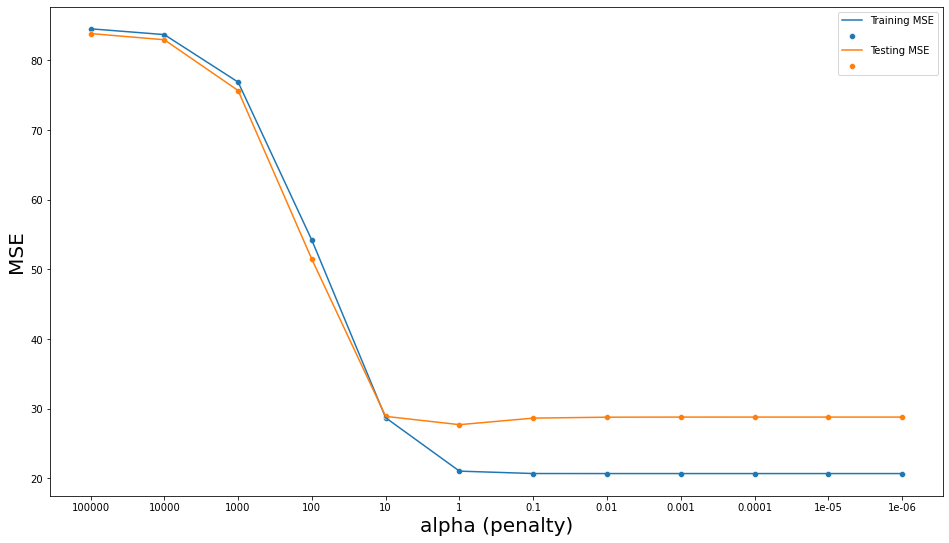

In [82]:
# visualisasi

length = range(len(alpha))

plt.figure(figsize=(16,9))

sns.lineplot(x=length, y=training_mse)
sns.scatterplot(x=length, y=training_mse)

sns.lineplot(x=length, y=testing_mse)
sns.scatterplot(x=length, y=testing_mse)

plt.xticks(length, alpha)
plt.legend(['Training MSE','','Testing MSE',''])

plt.xlabel('alpha (penalty)', size=20)
plt.ylabel('MSE', size=20)

plt.show()

**Interpretasi**

- Nilai alpha besar (100000 sampai 100) menyebabkan underfitting
- Nilai alpha semakin kecil, model semakin general

- Nilai alpha terbaik adalah 1 dengan MSE=27.68

- Nilai alpha kecil (0.1 sampai 0.000001) menyebabkan overfitting
- Nilai alpha semakin kecil, performa model pada Traning set semakin baik (MSE mengecil), tetapi performa pada Testing set semakin buruk (MSE membesar) 



In [83]:
print('Best alpha: ', best_alpha)
print('MSE: ', score)

Best alpha:  1
MSE:  27.686878880361675


In [84]:
pd.DataFrame({
    'alpha': alpha,
    'Training MSE': training_mse,
    'Testing MSE': testing_mse
})

,alpha,Training MSE,Testing MSE
0,100000.000000,84.542598,83.858801
1,10000.000000,83.709846,82.969277
2,1000.000000,76.889003,75.677980
3,100.000000,54.172112,51.428245
4,10.000000,28.680369,28.878246
5,1.000000,21.012610,27.686879
6,0.100000,20.669433,28.627257
7,0.010000,20.664355,28.761537
8,0.001000,20.664301,28.775542
9,0.000100,20.664301,28.776948


### Lasso Regression

#### Modeling Lasso (alpha=1)

In [101]:
# define model
lasso = Lasso(alpha=1)

# fitting model
lasso.fit(X_train_scaled, y_train)

# predict
y_pred = lasso.predict(X_test_scaled)

# MSE
mean_squared_error(y_test, y_pred)

63.08129127931523

In [102]:
lasso.coef_

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -1.90743945,
       -0.        ,  0.        , -6.44284476])

In [106]:
lasso_coef = pd.DataFrame({
    'Feature_Name': list(X),
    'Coef': lasso.coef_
}).sort_values('Coef')

lasso_coef

,Feature_Name,Coef
12,LSTAT,-6.442845
9,TAX,-1.907439
0,CRIM,-0.000000
1,ZN,0.000000
2,INDUS,-0.000000
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,0.000000
6,AGE,-0.000000
7,DIS,0.000000


''

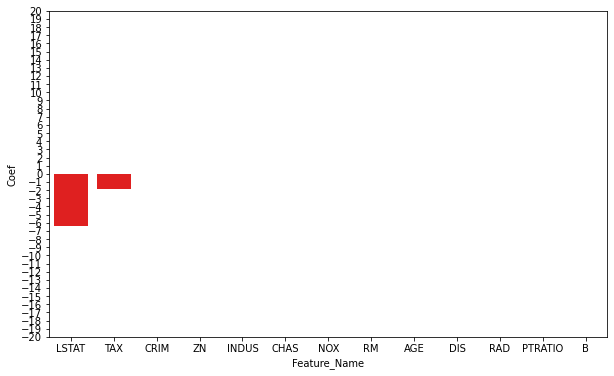

In [108]:
plt.figure(figsize=(10,6))
sns.barplot(data=lasso_coef, x='Feature_Name', y='Coef', color='r')
plt.yticks(range(-20,21))
;

#### Modeling Lasso (alpha=0.01)

In [115]:
# define model
lasso = Lasso(alpha=0.01)

# fitting model
lasso.fit(X_train_scaled, y_train)

# predict
y_pred = lasso.predict(X_test_scaled)

# MSE
mean_squared_error(y_test, y_pred)

28.859161383602355

In [116]:
lasso_coef = pd.DataFrame({
    'Feature_Name': list(X),
    'Coef': lasso.coef_
}).sort_values('Coef')

lasso_coef

,Feature_Name,Coef
12,LSTAT,-20.278330
7,DIS,-12.459480
0,CRIM,-8.956485
10,PTRATIO,-8.601375
4,NOX,-5.952448
9,TAX,-5.812747
2,INDUS,0.000000
6,AGE,0.000000
3,CHAS,1.663054
1,ZN,1.906448


''

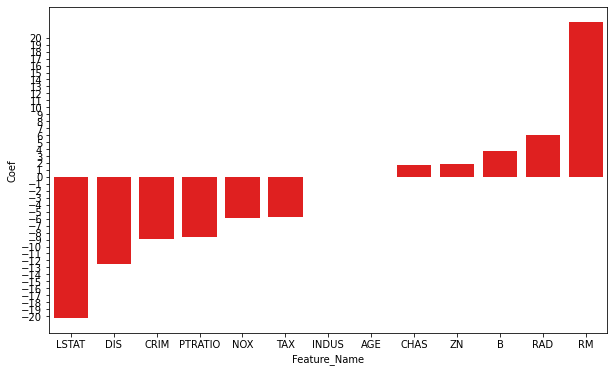

In [117]:
plt.figure(figsize=(10,6))
sns.barplot(data=lasso_coef, x='Feature_Name', y='Coef', color='r')
plt.yticks(range(-20,21))
;

### Looping: Mencari nilai alpha terbaik 

In [119]:
# Looping: mencari nilai alpha terbaik

alpha = [100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]

training_mse = []
testing_mse = []

score = 1000

for i in alpha:

    # fitting
    lasso = Lasso(alpha=i)
    lasso.fit(X_train_scaled, y_train)

    # predict to train set
    y_pred_train = lasso.predict(X_train_scaled)
    mse_train = mean_squared_error(y_train, y_pred_train)
    training_mse.append(mse_train)

    # predict to test set
    y_pred_test = lasso.predict(X_test_scaled)
    mse_test = mean_squared_error(y_test, y_pred_test)
    testing_mse.append(mse_test)

    if mse_test < score:
        score = mse_test
        best_alpha = i

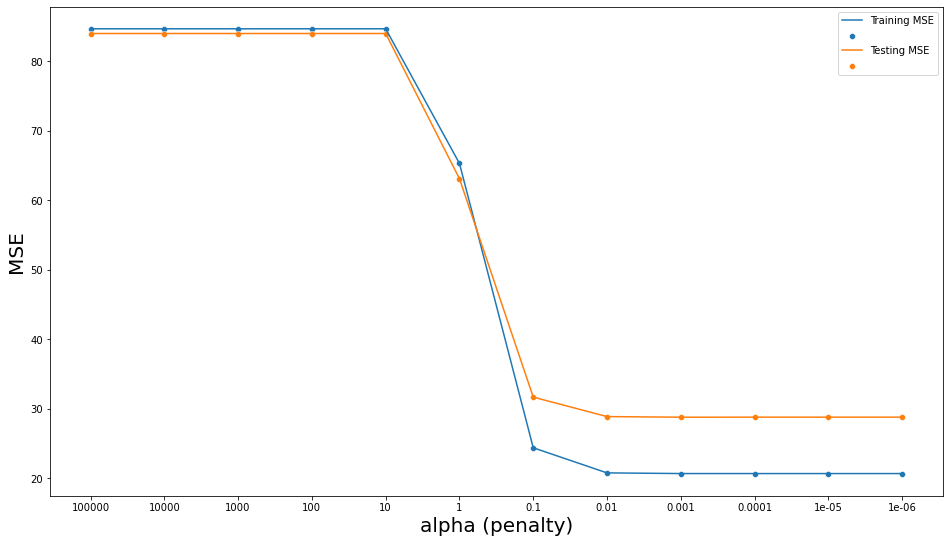

In [120]:
# visualisasi

length = range(len(alpha))

plt.figure(figsize=(16,9))

sns.lineplot(x=length, y=training_mse)
sns.scatterplot(x=length, y=training_mse)

sns.lineplot(x=length, y=testing_mse)
sns.scatterplot(x=length, y=testing_mse)

plt.xticks(length, alpha)
plt.legend(['Training MSE','','Testing MSE',''])

plt.xlabel('alpha (penalty)', size=20)
plt.ylabel('MSE', size=20)

plt.show()

**Interpretasi**

- Nilai alpha besar (100000 sampai 1) menyebabkan underfitting
- Semakin kecil nilai alpha, maka model semakin general

- Nilai alpha terbaik adalah 0.001 dengan MSE=28.77

- Nilai alpha kecil (0.0001 dan seterusnya) menyebabkan overfitting
- Semakin kecil nilai alpha, yang terjadi adalah performa model pada train set semakin baik (MSE mengecil) tapi performa pada test set semakin buruk (MSE membesar)

**Perbedaan Lasso dan Ridge**
- Lasso dapat menyebabkan coefficient regeresi menjadi 0 jika penalty yang diberikan besar
- Sedangkan pada Ridge, coefficient regresi hanya akan mendekati 0 (tidak akan sampai 0) jika penalty yang diberikan besar. 

In [122]:
print('Best alpha for Lasso: ', best_alpha)
print('MSE: ', score)

Best alpha for Lasso:  0.001
MSE:  28.770786557661086


In [123]:
# Training MSE dan Testing MSE untuk tiap nilai alpha

pd.DataFrame({
    'alpha':alpha,
    'Traing MSE': training_mse,
    'Testing MSE': testing_mse
})

,alpha,Traing MSE,Testing MSE
0,100000.000000,84.637191,83.959835
1,10000.000000,84.637191,83.959835
2,1000.000000,84.637191,83.959835
3,100.000000,84.637191,83.959835
4,10.000000,84.637191,83.959835
5,1.000000,65.273673,63.081291
6,0.100000,24.374053,31.660629
7,0.010000,20.759526,28.859161
8,0.001000,20.665486,28.770787
9,0.000100,20.664313,28.776328


### Dalam kasus prediksi harga rumah yang kita lakukan, model terbaik yang sebaiknya kita gunakan adalah?

- Best MSE Ridge: 27.68 (dengan alpha=1)
- Best MSE Lasso: 28.77 (dengan alpha=0.001)

Model terbaik adalah Ridge (dengan alpha=1) karena MSE-nya lebih kecil

# Exercise: Ridge & Lasso

**Gunakan dataset 'Admission_Predict'**

        - Features: 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA'
        - Target: 'Chance of Admit'

- Lakukan data splitting dengan proporsi 80:20 dan random_state = 42.

- Gunakan model Ridge Regression dan Lasso Regression dengan berbagai nilai alpha (100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001).
  
- Berapa nilai alpha terbaik untuk tiap model?
  
- Bandingkan performa kedua model ditinjau dari nilai MSE-nya, manakah yang lebih baik?